In [1]:
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import thermo
from GERG2008.gerg2008 import *

In [2]:
# thermo
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CEOSGas, FlashPureVLS

In [3]:
constants, correlations = ChemicalConstantsPackage.from_IDs(['hydrogen'])
eos_kwargs = dict(Tcs=constants.Tcs, Pcs=constants.Pcs, omegas=constants.omegas)
liquid = CEOSLiquid(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases, eos_kwargs=eos_kwargs)
gas = CEOSGas(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases, eos_kwargs=eos_kwargs)
flasher = FlashPureVLS(constants, correlations, gas=gas, liquids=[liquid], solids=[])

In [4]:
Z_p_th = []
JT_p_th = []
MM_p_th = []
Cp_p_th = []
Cv_p_th = []

In [5]:
# chemical
from thermo.chemical import Chemical

In [6]:
h2 = Chemical('hydrogen')

In [7]:
Z_p_chemical = []
JT_p_chemical = []
MM_p_chemical = []
Cp_p_chemical = []
Cv_p_chemical = []

In [8]:
# gerg2008
gas_comp = OrderedDict([('hydrogen', 1.0)])

In [9]:
Z_p_gerg = []
JT_p_gerg = []
MM_p_gerg = []
Cp_p_gerg = []
Cv_p_gerg = []

In [10]:
pressure_list = np.arange(0.1, 35e+6, 0.5e+6) # Pa

In [11]:
for i in range(0, len(pressure_list)):
    res = flasher.flash(T=300, P=pressure_list[i])
    Z_p_th.append(res.Z()) # -
    JT_p_th.append(res.Joule_Thomson()) # K/Pa
    MM_p_th.append(res.MW()) # g/mol
    Cp_p_th.append(res.Cp()) # J/mol/K
    Cv_p_th.append(res.Cv()) # J/mol/K
    
    h2.calculate(T=300, P=pressure_list[i])
    Z_p_chemical.append(h2.Z) # -
    JT_p_chemical.append(h2.JT) # K/Pa
    MM_p_chemical.append(h2.MW) # g/mol
    Cp_p_chemical.append(h2.Cpm) # J/mol/K
    Cv_p_chemical.append(h2.Cvgm) # J/mol/K
    
    gas_mixture = GasMixtureGERG2008(P=pressure_list[i], T=300, composition=gas_comp)
    Z_p_gerg.append(gas_mixture.Z) # -
    JT_p_gerg.append(gas_mixture.JT/1000) # K/kPa
    MM_p_gerg.append(gas_mixture.MolarMass) # g/mol
    Cp_p_gerg.append(gas_mixture.Cp) # J/mol/K
    Cv_p_gerg.append(gas_mixture.Cv) # J/mol/K

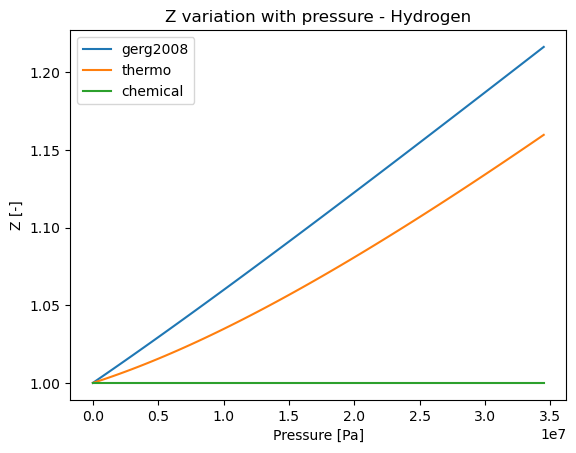

In [12]:
plt.figure()
plt.plot(pressure_list, Z_p_gerg, label="gerg2008")
plt.plot(pressure_list, Z_p_th, label="thermo")
plt.plot(pressure_list, Z_p_chemical, label="chemical")
plt.xlabel("Pressure [Pa]")
plt.ylabel("Z [-]")
plt.legend()
plt.title("Z variation with pressure - Hydrogen")
plt.show()

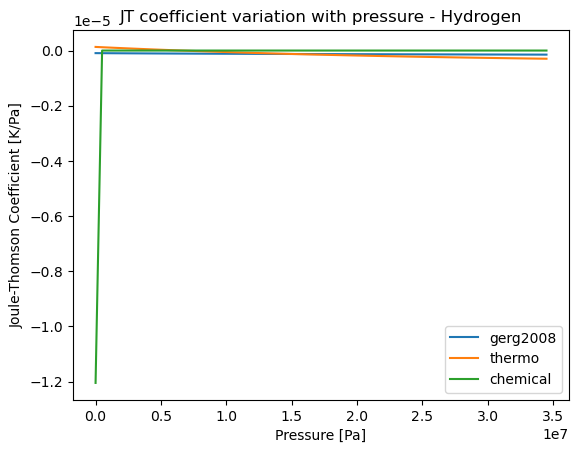

In [13]:
plt.figure()
plt.plot(pressure_list, JT_p_gerg, label="gerg2008")
plt.plot(pressure_list, JT_p_th, label="thermo")
plt.plot(pressure_list, JT_p_chemical, label="chemical")
plt.xlabel("Pressure [Pa]")
plt.ylabel("Joule-Thomson Coefficient [K/Pa]")
plt.legend()
plt.title("JT coefficient variation with pressure - Hydrogen")
plt.show()

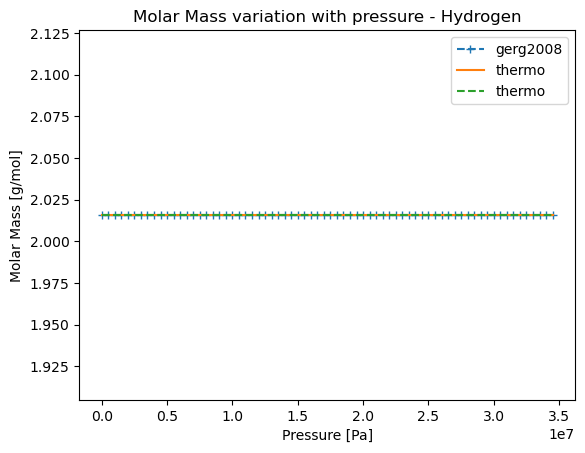

In [14]:
plt.figure()
plt.plot(pressure_list, MM_p_gerg,'--+', label="gerg2008")
plt.plot(pressure_list, MM_p_th, label="thermo")
plt.plot(pressure_list, MM_p_chemical, '--', label="thermo")
plt.xlabel("Pressure [Pa]")
plt.ylabel("Molar Mass [g/mol]")
plt.legend()
plt.title("Molar Mass variation with pressure - Hydrogen")
plt.show()

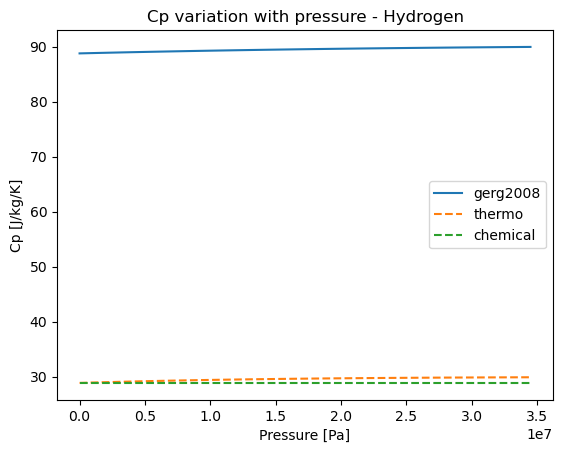

In [15]:
plt.figure()
plt.plot(pressure_list, Cp_p_gerg, label="gerg2008")
plt.plot(pressure_list, Cp_p_th, '--', label="thermo")
plt.plot(pressure_list, Cp_p_chemical, '--', label="chemical")
plt.xlabel("Pressure [Pa]")
plt.ylabel("Cp [J/kg/K]")
plt.legend()
plt.title("Cp variation with pressure - Hydrogen")
plt.show()

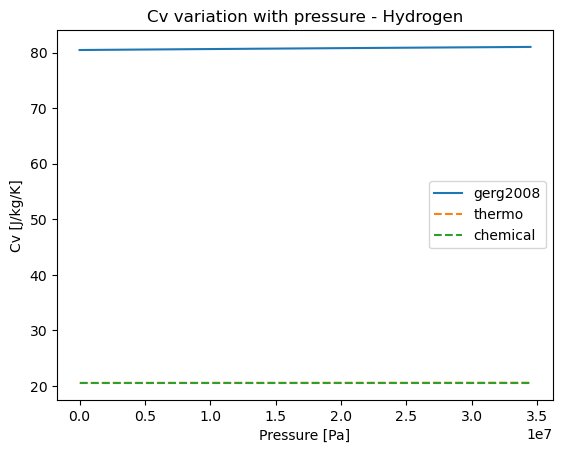

In [16]:
plt.figure()
plt.plot(pressure_list, Cv_p_gerg, label="gerg2008")
plt.plot(pressure_list, Cv_p_th, '--', label="thermo")
plt.plot(pressure_list, Cv_p_chemical, '--', label="chemical")
plt.xlabel("Pressure [Pa]")
plt.ylabel("Cv [J/kg/K]")
plt.legend()
plt.title("Cv variation with pressure - Hydrogen")
plt.show()

In [17]:
# thermo
Z_T_th = []
JT_T_th = []
MM_T_th = []
Cp_T_th = []
Cv_T_th = []

In [18]:
# chemical
Z_T_chemical = []
JT_T_chemical = []
MM_T_chemical = []
Cp_T_chemical = []
Cv_T_chemical = []

In [19]:
# gerg2008
Z_T_gerg = []
JT_T_gerg = []
MM_T_gerg = []
Cp_T_gerg = []
Cv_T_gerg = []

In [20]:
temperature_list = np.arange(90, 450, 5) # K

In [21]:
for i in range(0, len(temperature_list)):
    res = flasher.flash(T=temperature_list[i], P=101325)
    Z_T_th.append(res.Z()) # -
    JT_T_th.append(res.Joule_Thomson()) # K/Pa
    MM_T_th.append(res.MW()) # g/mol
    Cp_T_th.append(res.Cp()) # J/mol/K
    Cv_T_th.append(res.Cv()) # J/mol/K
    
    h2.calculate(T=temperature_list[i], P=101325)
    Z_T_chemical.append(h2.Z) # -
    JT_T_chemical.append(h2.JT) # K/Pa
    MM_T_chemical.append(h2.MW) # g/mol
    Cp_T_chemical.append(h2.Cpm) # J/mol/K
    Cv_T_chemical.append(h2.Cvgm) # J/mol/K
    
    gas_mixture = GasMixtureGERG2008(P=101325, T=temperature_list[i], composition=gas_comp)
    Z_T_gerg.append(gas_mixture.Z) # -
    JT_T_gerg.append(gas_mixture.JT/1000) # K/Pa
    MM_T_gerg.append(gas_mixture.MolarMass) # g/mol
    Cp_T_gerg.append(gas_mixture.Cp) # J/mol/K
    Cv_T_gerg.append(gas_mixture.Cv) # J/mol/K

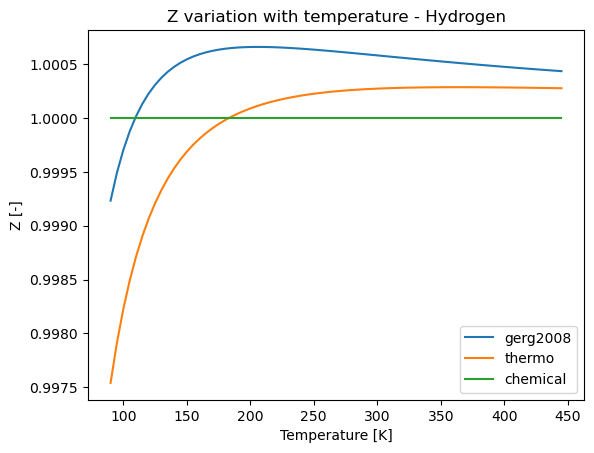

In [22]:
plt.figure()
plt.plot(temperature_list, Z_T_gerg, label="gerg2008")
plt.plot(temperature_list, Z_T_th, label="thermo")
plt.plot(temperature_list, Z_T_chemical, label="chemical")
plt.xlabel("Temperature [K]")
plt.ylabel("Z [-]")
plt.legend()
plt.title("Z variation with temperature - Hydrogen")
plt.show()

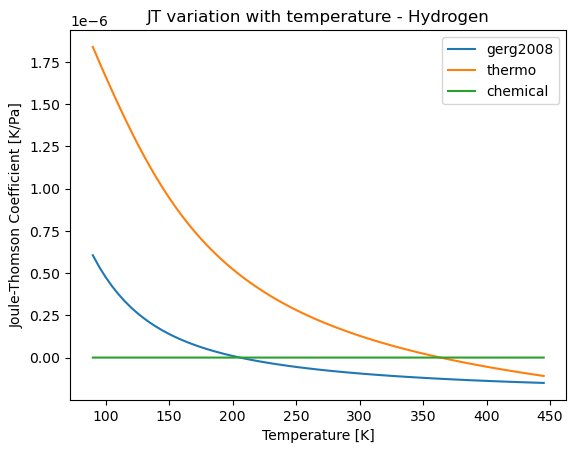

In [23]:
plt.figure()
plt.plot(temperature_list, JT_T_gerg, label="gerg2008")
plt.plot(temperature_list, JT_T_th, label="thermo")
plt.plot(temperature_list, JT_T_chemical , label="chemical")
plt.xlabel("Temperature [K]")
plt.ylabel("Joule-Thomson Coefficient [K/Pa]")
plt.legend()
plt.title("JT variation with temperature - Hydrogen")
plt.show()

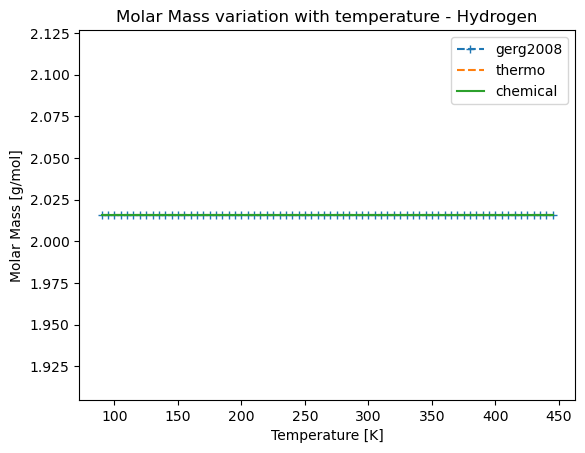

In [24]:
plt.figure()
plt.plot(temperature_list, MM_T_gerg,'--+', label="gerg2008")
plt.plot(temperature_list, MM_T_th, '--', label="thermo")
plt.plot(temperature_list, MM_T_chemical, label="chemical")
plt.xlabel("Temperature [K]")
plt.ylabel("Molar Mass [g/mol]")
plt.legend()
plt.title("Molar Mass variation with temperature - Hydrogen")
plt.show()

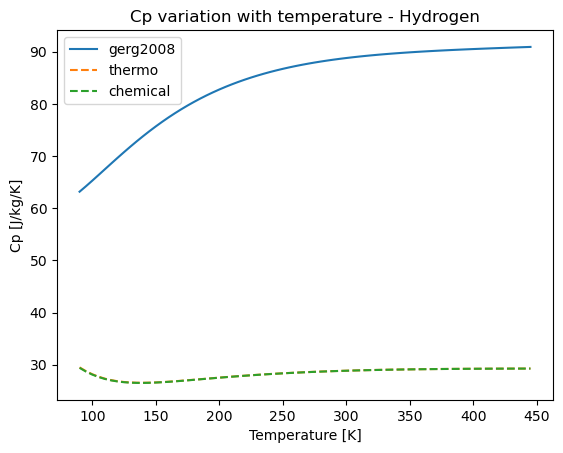

In [25]:
plt.figure()
plt.plot(temperature_list, Cp_T_gerg, label="gerg2008")
plt.plot(temperature_list, Cp_T_th, '--', label="thermo")
plt.plot(temperature_list, Cp_T_chemical, '--', label="chemical")
plt.xlabel("Temperature [K]")
plt.ylabel("Cp [J/kg/K]")
plt.legend()
plt.title("Cp variation with temperature - Hydrogen")
plt.show()

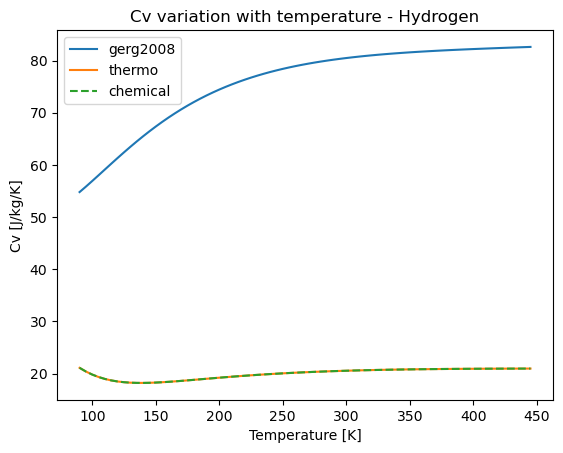

In [26]:
plt.figure()
plt.plot(temperature_list, Cv_T_gerg, label="gerg2008")
plt.plot(temperature_list, Cv_T_th, label="thermo")
plt.plot(temperature_list, Cv_T_chemical,'--', label="chemical")
plt.xlabel("Temperature [K]")
plt.ylabel("Cv [J/kg/K]")
plt.legend()
plt.title("Cv variation with temperature - Hydrogen")
plt.show()

In [27]:
# check with different equations of state for mix
from thermo import eos_mix
from scipy.constants import bar

In [28]:
eos_mix.eos_mix_list

[thermo.eos_mix.PRMIX,
 thermo.eos_mix.SRKMIX,
 thermo.eos_mix.PR78MIX,
 thermo.eos_mix.VDWMIX,
 thermo.eos_mix.PRSVMIX,
 thermo.eos_mix.PRSV2MIX,
 thermo.eos_mix.TWUPRMIX,
 thermo.eos_mix.TWUSRKMIX,
 thermo.eos_mix.APISRKMIX,
 thermo.eos_mix.IGMIX,
 thermo.eos_mix.RKMIX,
 thermo.eos_mix.PRMIXTranslatedConsistent,
 thermo.eos_mix.PRMIXTranslatedPPJP,
 thermo.eos_mix.SRKMIXTranslatedConsistent,
 thermo.eos_mix.PRMIXTranslated,
 thermo.eos_mix.SRKMIXTranslated]

In [29]:
for eos_method in eos_mix.eos_mix_list:
    liquid = CEOSLiquid(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases,
                    eos_kwargs=eos_kwargs)
    gas = CEOSGas(eos_method, HeatCapacityGases=correlations.HeatCapacityGases, 
                  eos_kwargs=eos_kwargs)
    flasher = FlashPureVLS(constants, correlations, liquids=[liquid], gas=gas, solids=[])

    res = flasher.flash(T=300, P=101325)
    
    print(res.Z())

1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0
1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0002742696922853
1.0002742696922853


In [30]:
# different just for thermo.eos_mix.IGMIX -> ideal gas mix!